## Importing important library

In [1]:
import os 
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

## Read the data

In [2]:
df_main = pd.read_parquet(r"C:\Users\Manish kumar\Downloads\yellow_tripdata_2022-09 .parquet")

In [3]:
df_100000=df_main.sample(100000, random_state=0)

In [4]:
df= df_100000.copy()

In [5]:
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
1895567,1,2022-09-20 10:08:19,2022-09-20 10:32:24,1.0,3.30,99.0,N,25,62,1,17.2,0.0,0.5,0.00,0.0,0.3,18.00,0.0,0.00
2729396,2,2022-09-28 10:26:30,2022-09-28 11:06:53,1.0,11.78,1.0,N,132,17,1,38.5,0.0,0.5,7.86,0.0,0.3,48.41,0.0,1.25
2800893,2,2022-09-28 20:08:54,2022-09-28 20:20:53,1.0,1.96,1.0,N,161,68,1,9.5,1.0,0.5,2.76,0.0,0.3,16.56,2.5,0.00
903727,2,2022-09-09 21:21:02,2022-09-09 21:29:52,1.0,1.89,1.0,N,263,162,1,8.5,0.5,0.5,1.00,0.0,0.3,13.30,2.5,0.00
730612,2,2022-09-08 14:19:05,2022-09-08 14:35:21,1.0,2.17,1.0,N,236,229,1,11.5,0.0,0.5,3.70,0.0,0.3,18.50,2.5,0.00


In [6]:
df.shape

(100000, 19)

## Checking null values . 

In [7]:
df.isnull().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          3566
trip_distance               0
RatecodeID               3566
store_and_fwd_flag       3566
PULocationID                0
DOLocationID                0
payment_type                0
fare_amount                 0
extra                       0
mta_tax                     0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     3566
airport_fee              3566
dtype: int64

In [8]:
null_percentages = df.isnull().sum() / len(df) * 100
print(null_percentages)

VendorID                 0.000
tpep_pickup_datetime     0.000
tpep_dropoff_datetime    0.000
passenger_count          3.566
trip_distance            0.000
RatecodeID               3.566
store_and_fwd_flag       3.566
PULocationID             0.000
DOLocationID             0.000
payment_type             0.000
fare_amount              0.000
extra                    0.000
mta_tax                  0.000
tip_amount               0.000
tolls_amount             0.000
improvement_surcharge    0.000
total_amount             0.000
congestion_surcharge     3.566
airport_fee              3.566
dtype: float64


### We have only 3% null values so can drop also.

In [9]:
df.dropna(inplace=True)

In [10]:
null_percentages = df.isnull().sum() / len(df) * 100
print(null_percentages)

VendorID                 0.0
tpep_pickup_datetime     0.0
tpep_dropoff_datetime    0.0
passenger_count          0.0
trip_distance            0.0
RatecodeID               0.0
store_and_fwd_flag       0.0
PULocationID             0.0
DOLocationID             0.0
payment_type             0.0
fare_amount              0.0
extra                    0.0
mta_tax                  0.0
tip_amount               0.0
tolls_amount             0.0
improvement_surcharge    0.0
total_amount             0.0
congestion_surcharge     0.0
airport_fee              0.0
dtype: float64


### Now we dont have any null values  

# EDA

### Checking data types 

In [11]:
df.dtypes

VendorID                          int64
tpep_pickup_datetime     datetime64[ns]
tpep_dropoff_datetime    datetime64[ns]
passenger_count                 float64
trip_distance                   float64
RatecodeID                      float64
store_and_fwd_flag               object
PULocationID                      int64
DOLocationID                      int64
payment_type                      int64
fare_amount                     float64
extra                           float64
mta_tax                         float64
tip_amount                      float64
tolls_amount                    float64
improvement_surcharge           float64
total_amount                    float64
congestion_surcharge            float64
airport_fee                     float64
dtype: object

## We can extract the types of data 

In [12]:
obj = []
num=[]

col= df.columns

for i in col:
    if df[i].dtype=='object':
        obj.append(i)
    else:
            num.append(i)
print('Object Columns\n')            
print(obj) 
print('*'*60)
print('Int Columns\n')
print(num)

Object Columns

['store_and_fwd_flag']
************************************************************
Int Columns

['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']


In [13]:
def object_cat(data,x):              
    value=data[x].value_counts()
    unique= data[x].unique()
    print('Values:\n',value,'\n')
    print('Unique:\n',unique)
    
    sns.countplot(data=data,x=x)
    plt.show()

Values:
 N    95598
Y      836
Name: store_and_fwd_flag, dtype: int64 

Unique:
 ['N' 'Y']


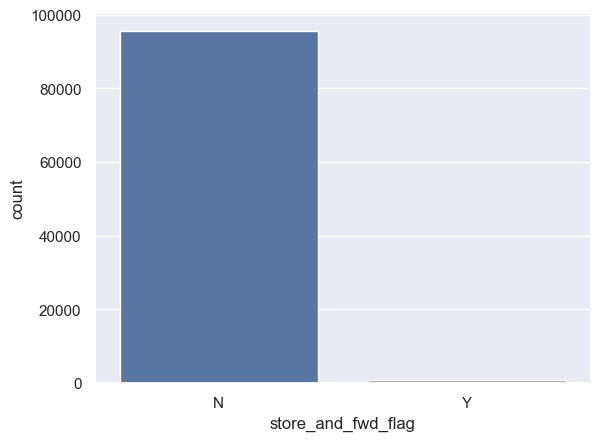

In [14]:
object_cat(data=df,x='store_and_fwd_flag')

#### This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server. Y= store and forward trip N= not a store and forward trip

Values:
 2    68876
1    27558
Name: VendorID, dtype: int64 

Unique:
 [1 2]


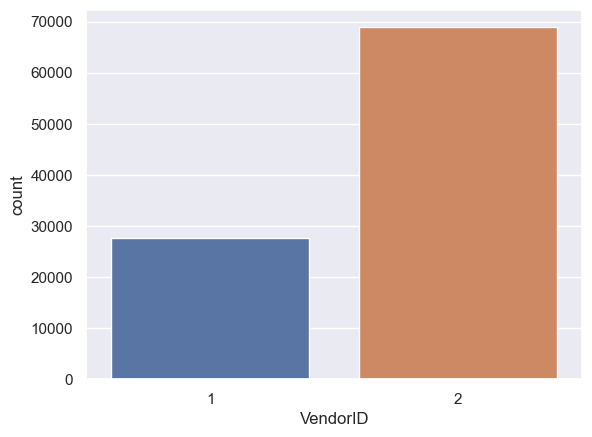

In [15]:
object_cat(data = df, x='VendorID')

#### A code indicating the TPEP provider that provided the record.

Values:
 1.0     90262
2.0      4389
5.0       969
99.0      379
3.0       299
4.0       136
Name: RatecodeID, dtype: int64 

Unique:
 [99.  1.  3.  2.  5.  4.]


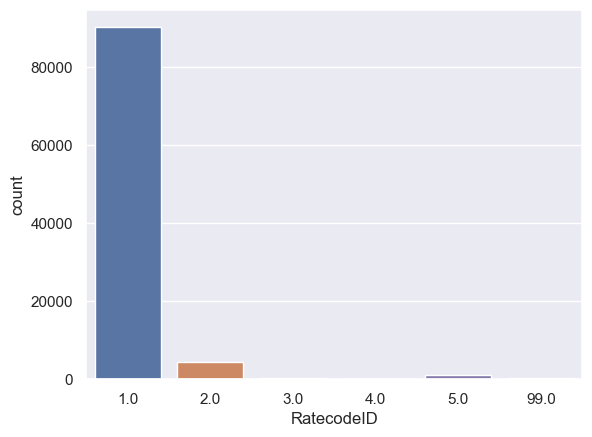

In [16]:
object_cat(data= df,x='RatecodeID')

In [17]:
df["RatecodeID"]=df["RatecodeID"].map({1:"Standard_rate", 2:"JFK", 3:"Newark", 4:"Nassau", 
                                       5:"Negotiated_fare",6:"group_ride"})

#### 1= Standard rate 2=JFK 3=Newark 4=Nassau or Westchester 5=Negotiated fare 6=Group ride

In [18]:
df['VendorID'] = df['VendorID'].map({1:'CMT', 2:'Verifone'})

#### Here CMT : Creative Mobile Technologies

Values:
 Verifone    68876
CMT         27558
Name: VendorID, dtype: int64 

Unique:
 ['CMT' 'Verifone']


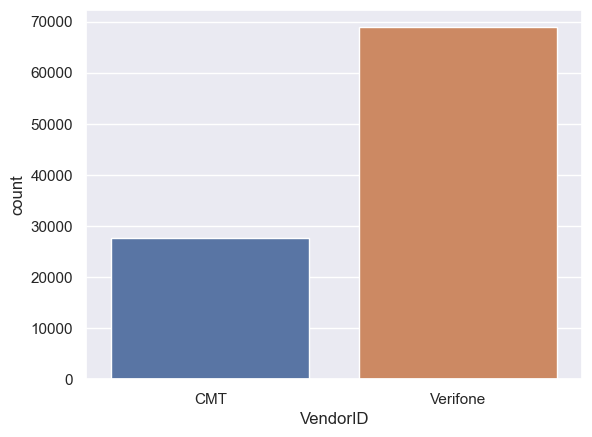

In [19]:
object_cat(data= df, x='VendorID')

Values:
 1.0    71766
2.0    14827
3.0     3768
0.0     1848
5.0     1572
4.0     1570
6.0     1080
7.0        2
9.0        1
Name: passenger_count, dtype: int64 

Unique:
 [1. 2. 3. 0. 5. 6. 4. 7. 9.]


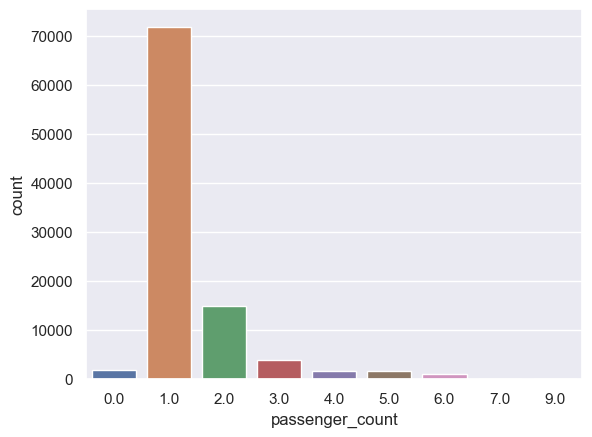

In [20]:
object_cat(data=df,x='passenger_count')

In [21]:
df[df.passenger_count==0.0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
2991738,CMT,2022-09-30 13:39:59,2022-09-30 13:51:00,0.0,1.2,Standard_rate,N,237,142,2,9.0,2.50,0.5,0.00,0.00,0.3,12.30,2.5,0.00
2314509,CMT,2022-09-24 08:52:36,2022-09-24 08:57:52,0.0,1.2,Standard_rate,N,141,229,1,6.0,2.50,0.5,1.85,0.00,0.3,11.15,2.5,0.00
2361223,CMT,2022-09-24 17:14:52,2022-09-24 17:30:06,0.0,1.6,Standard_rate,N,161,163,3,11.0,2.50,0.5,0.00,0.00,0.3,14.30,2.5,0.00
2687057,CMT,2022-09-27 20:17:38,2022-09-27 20:36:53,0.0,8.9,Standard_rate,N,138,186,1,26.0,4.25,0.5,5.00,6.55,0.3,42.60,2.5,1.25
387955,CMT,2022-09-05 00:21:13,2022-09-05 00:30:42,0.0,2.1,Standard_rate,N,249,137,2,8.5,3.00,0.5,0.00,0.00,0.3,12.30,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374016,CMT,2022-09-24 18:50:54,2022-09-24 19:18:24,0.0,3.5,Standard_rate,N,239,74,2,19.5,2.50,0.5,0.00,0.00,0.3,22.80,2.5,0.00
2355073,CMT,2022-09-24 16:05:12,2022-09-24 16:21:48,0.0,1.2,Standard_rate,N,48,163,2,11.0,2.50,0.5,0.00,0.00,0.3,14.30,2.5,0.00
3046789,CMT,2022-09-30 20:12:25,2022-09-30 20:25:58,0.0,3.1,Standard_rate,N,239,152,1,12.0,3.00,0.5,3.15,0.00,0.3,18.95,2.5,0.00
842007,CMT,2022-09-09 13:38:44,2022-09-09 14:06:04,0.0,3.7,Standard_rate,N,161,45,1,18.0,2.50,0.5,2.00,0.00,0.3,23.30,2.5,0.00


#### The number of passengers in the vehicle.

In [22]:
 def univariate_num(data,x):
    missing=data[x].isnull().sum()
    min1=round(data[x].min(), 2)
    max1=round(data[x].max(), 2)
    mean=round(data[x].mean(), 2)
    var=round(data[x].var(), 2)
    std=round(data[x].std(),2)
    range1=round(max1-min1, 2)
    q1=round(data[x].quantile(.25), 2)
    q2=round(data[x].quantile(.5),2)
    q3=round(data[x].quantile(.75), 2)
    skew=round(data[x].skew(), 2)
    kurt=round(data[x].kurt(), 2)
    myvalue={"missing":missing, "min":min1, "max":max1, "mean":mean,
             "var":var,"std":std, "range":range1,"q1":q1, "q2":q2,"q3":q3,
            "skewness":skew, "kurtosis":kurt}
    sns.boxplot(data=data, y=data[x])
    plt.show()
    return myvalue

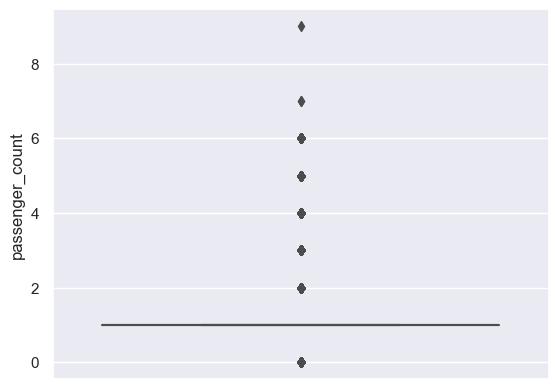

{'missing': 0,
 'min': 0.0,
 'max': 9.0,
 'mean': 1.38,
 'var': 0.87,
 'std': 0.93,
 'range': 9.0,
 'q1': 1.0,
 'q2': 1.0,
 'q3': 1.0,
 'skewness': 2.81,
 'kurtosis': 8.95}

In [23]:
univariate_num(data = df , x= 'passenger_count')

### We can see there are aslo no passenger in our data so can create a new column as passenger_cat.

In [24]:
def passenger(x):
    if x<=1:
        return 'no_or_one_passenger'
    elif x==2:
        return 'Two_passeneger'
    elif x>=3:
        return 'More_than_two_passenger'

In [25]:
df['passenger_cat'] = df['passenger_count'].apply(passenger)

Values:
 no_or_one_passenger        73614
Two_passeneger             14827
More_than_two_passenger     7993
Name: passenger_cat, dtype: int64 

Unique:
 ['no_or_one_passenger' 'Two_passeneger' 'More_than_two_passenger']


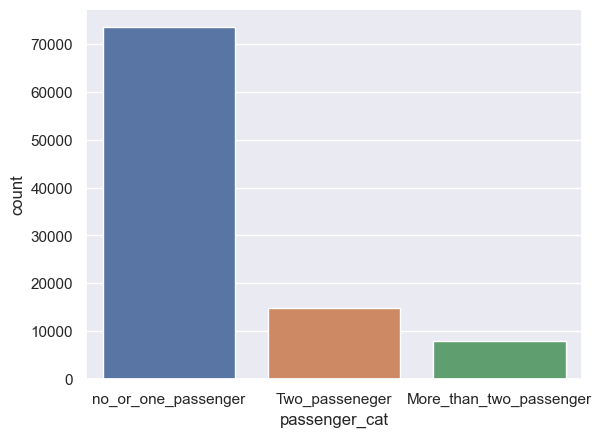

In [26]:
object_cat(data=df, x='passenger_cat')

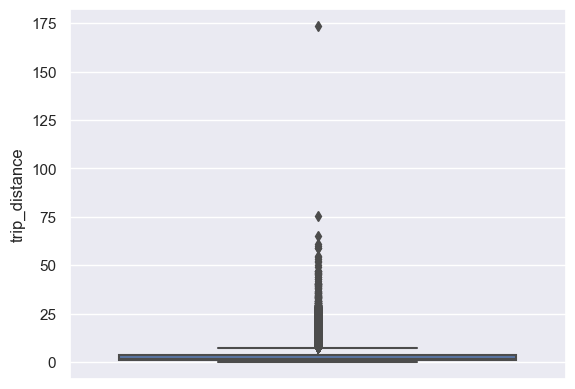

{'missing': 0,
 'min': 0.0,
 'max': 173.46,
 'mean': 3.66,
 'var': 22.04,
 'std': 4.7,
 'range': 173.46,
 'q1': 1.11,
 'q2': 1.9,
 'q3': 3.7,
 'skewness': 3.11,
 'kurtosis': 26.65}

In [27]:
univariate_num(data = df, x='trip_distance')

In [28]:
df[df['trip_distance']==164072.79]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,passenger_cat


#### Here i can see there is a passenger who have trip_distance is 164072.79 km i think this is not possible because i seen the time of trip 

Values:
 236    4018
237    3971
161    3504
230    2908
170    2747
       ... 
5         1
253       1
206       1
245       1
176       1
Name: DOLocationID, Length: 250, dtype: int64 

Unique:
 [ 62  17  68 162 229 264 230   7 164  79  90 170 138 234 142 236 163 186
 232  43 237 144  75 143 166 239 246 263 100 140  42 141  74  48 151 114
 152 233 262 158 181 161  33 228  50 249 224 255 256 261   4 107 137 209
 113  95 211 231  45 238 116 146  13 129 125  49 132  61 260 205 156  41
 188  87  80  64  25 145 134 216  70  12  14 265 206 112 148 226  38  37
 213  92 225  88  24  85  10  82 193   1  63 243 192 168  20  66 177 179
 160 195 223 127 180 174  71  97  23 244  53  21  36 248 202 210  89   9
 197 194  28 165 220 200 167 218  40  98 207 219  91 185 130 198 106  65
 189  55 121 247  81 203 124 169  22  72  52 257 215  54 182 119 157 254
  83 102 173  93 108 242  69 175  76 135  35  56 252  26 196 217 250 131
 133 259 258  34 126  29 155  30  19  18 139 128 190  86  15  39  60  16

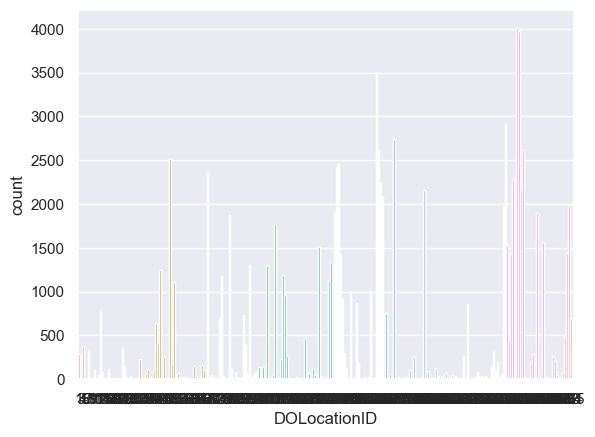

In [29]:
object_cat(data= df, x='DOLocationID')

In [30]:
df["is_pu_do_location_same"]=np.where(df["PULocationID"]==df["DOLocationID"],1,0)

In [31]:
df.drop(columns=["PULocationID", "DOLocationID"], inplace=True)

Values:
 0    91383
1     5051
Name: is_pu_do_location_same, dtype: int64 

Unique:
 [0 1]


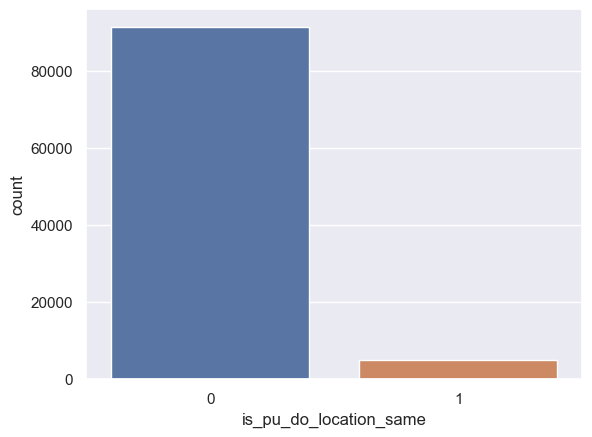

In [32]:
object_cat(data = df, x='is_pu_do_location_same')

### I can see 160192 records are on same loacation id 

Values:
 1    75909
2    19270
4      741
3      514
Name: payment_type, dtype: int64 

Unique:
 [1 2 3 4]


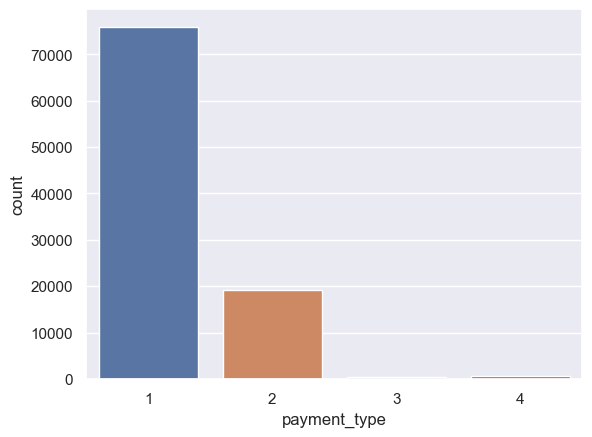

In [33]:
object_cat(data = df, x='payment_type')

In [34]:
df["payment_type"]=df["payment_type"].replace({1:"cc", 2:"cash", 
                                               3:"no_charge",4:"dispute", 
                                               5:"unknown",6:"voided_trip"})

Values:
 cc           75909
cash         19270
dispute        741
no_charge      514
Name: payment_type, dtype: int64 

Unique:
 ['cc' 'cash' 'no_charge' 'dispute']


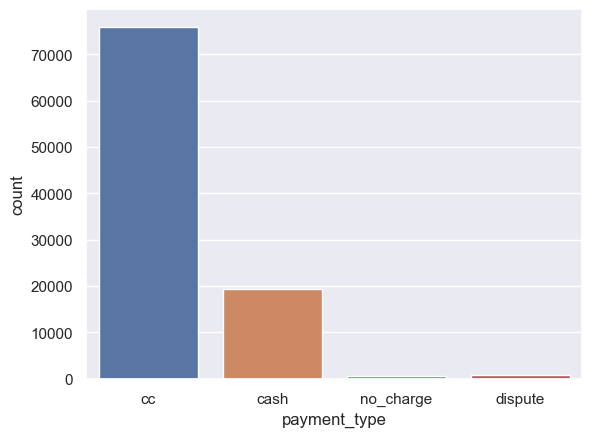

In [35]:
object_cat(data= df, x='payment_type')

### 1= Credit card, 2= Cash, 3= No charge, 4= Dispute, 5= Unknown and 6= Voided trip

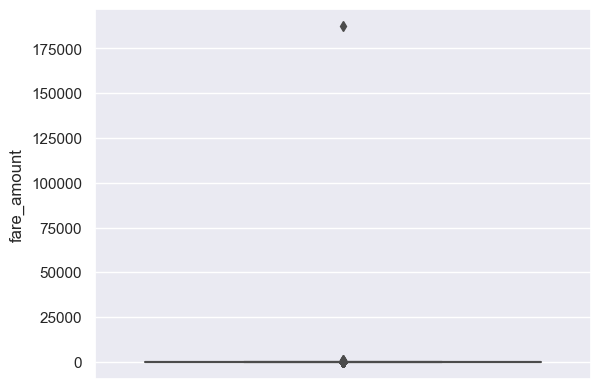

{'missing': 0,
 'min': -150.0,
 'max': 187444.96,
 'mean': 17.36,
 'var': 364521.4,
 'std': 603.76,
 'range': 187594.96,
 'q1': 7.0,
 'q2': 10.5,
 'q3': 17.2,
 'skewness': 310.24,
 'kurtosis': 96311.01}

In [36]:
univariate_num(data= df, x='fare_amount')

In [37]:
df[df['fare_amount']==187444.96]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,passenger_cat,is_pu_do_location_same
2367479,CMT,2022-09-24 17:49:31,2022-09-24 17:59:06,0.0,3.5,Standard_rate,N,dispute,187444.96,2.5,0.5,0.0,0.0,0.3,187448.26,2.5,0.0,no_or_one_passenger,0


In [38]:
df.fare_amount.describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.9,.95,.96,.97,.98,.99])

count     96434.000000
mean         17.362405
std         603.756073
min        -150.000000
1%            2.500000
2%            3.500000
3%            4.000000
4%            4.500000
5%            4.500000
25%           7.000000
50%          10.500000
75%          17.200000
90%          33.500000
95%          52.000000
96%          52.000000
97%          52.000000
98%          52.000000
99%          63.000000
max      187444.960000
Name: fare_amount, dtype: float64

In [39]:
df[df['extra']<0]['extra'].value_counts()

-0.5    183
-1.0    111
-4.5     16
-2.0      1
Name: extra, dtype: int64

### Extra can't be -ve amount 

In [40]:
df= df[df['extra']>=0]

Values:
  0.50    94537
 0.00     1221
-0.50      355
 2.54        7
 0.55        3
Name: mta_tax, dtype: int64 

Unique:
 [ 0.5   0.   -0.5   2.54  0.55]


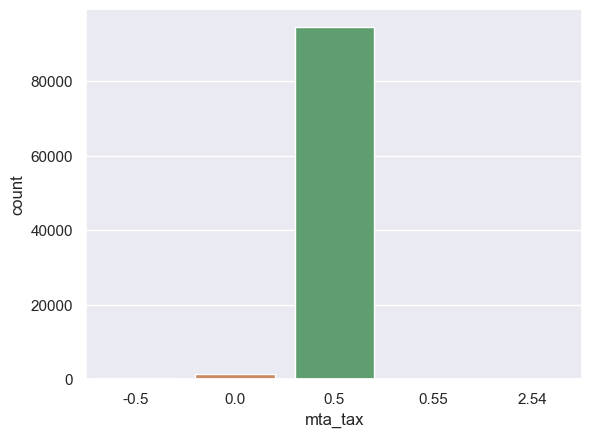

In [41]:
object_cat(data= df, x='mta_tax')

In [42]:
df[df['mta_tax']<0].shape

(355, 19)

### mta_tax cant be -ve

In [43]:
df=df[df['mta_tax']>=0]

Values:
  0.00    87247
 1.25     8517
-1.25        4
Name: airport_fee, dtype: int64 

Unique:
 [ 0.    1.25 -1.25]


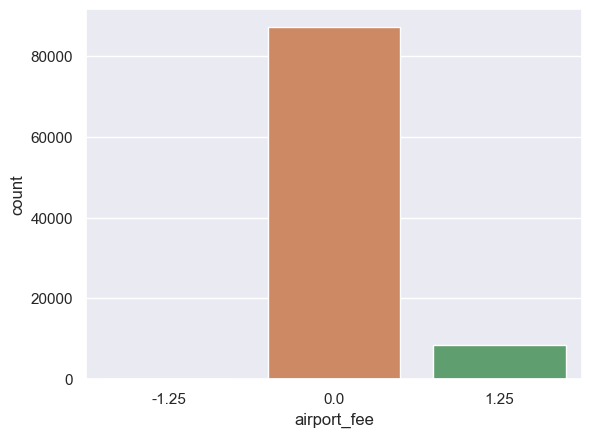

In [44]:
object_cat(data= df, x='airport_fee')

In [45]:
df[df['airport_fee']<0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,passenger_cat,is_pu_do_location_same
2182923,Verifone,2022-09-23 00:43:52,2022-09-23 00:44:01,3.0,0.02,Negotiated_fare,N,cash,-0.75,0.0,0.0,0.0,0.00,-0.3,-2.30,0.0,-1.25,More_than_two_passenger,1
1737226,Verifone,2022-09-17 08:32:03,2022-09-17 08:32:10,1.0,0.00,Negotiated_fare,N,cash,-61.85,0.0,0.0,0.0,0.00,-0.3,-63.40,0.0,-1.25,no_or_one_passenger,1
162925,Verifone,2022-09-02 16:01:56,2022-09-02 16:02:26,1.0,0.00,Negotiated_fare,N,cash,-52.50,0.0,0.0,0.0,-6.55,-0.3,-63.10,-2.5,-1.25,no_or_one_passenger,1
468775,Verifone,2022-09-06 06:58:19,2022-09-06 07:03:33,2.0,1.49,Newark,N,dispute,-24.50,0.0,0.0,0.0,0.00,-0.3,-26.05,0.0,-1.25,Two_passeneger,1


In [46]:
df.airport_fee.describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.9,.95,.96,.97,.98,.99])

count    95768.000000
mean         0.111115
std          0.355920
min         -1.250000
1%           0.000000
2%           0.000000
3%           0.000000
4%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          0.000000
95%          1.250000
96%          1.250000
97%          1.250000
98%          1.250000
99%          1.250000
max          1.250000
Name: airport_fee, dtype: float64

### airport_fee cant be -ve 

In [47]:
df = df[df['airport_fee']>=0]

Values:
  0.3    95685
 0.0       62
-0.3       17
Name: improvement_surcharge, dtype: int64 

Unique:
 [ 0.3 -0.3  0. ]


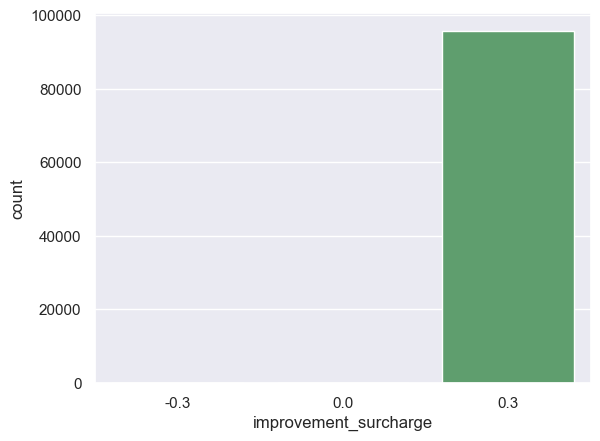

In [48]:
object_cat(data= df, x='improvement_surcharge')

In [49]:
df.drop('improvement_surcharge', axis=1,inplace=True)

## I can check the data type of  tpep_pickup_datetime

In [50]:
df['tpep_pickup_datetime'].dtype

dtype('<M8[ns]')

### tpep_pickup_datetime is in time date formate 

## I can find some useful variables from (tpep_pickup_datetime and tpep_dropoff_datetime)

In [51]:
df["year"]=df["tpep_pickup_datetime"].dt.year
df["month"]=df["tpep_pickup_datetime"].dt.month 
df["day"]=df["tpep_pickup_datetime"].dt.dayofweek
df["hour"]=df["tpep_pickup_datetime"].dt.hour
df["minute"]=df["tpep_pickup_datetime"].dt.minute
df["time"]=df["tpep_pickup_datetime"].dt.time

df["day_month"]=df["tpep_pickup_datetime"].dt.day


df["year_drop"]=df["tpep_dropoff_datetime"].dt.year
df["month_drop"]=df["tpep_dropoff_datetime"].dt.month 
df["day_drop"]=df["tpep_dropoff_datetime"].dt.dayofweek
df["hour_drop"]=df["tpep_dropoff_datetime"].dt.hour
df["minute_drop"]=df["tpep_dropoff_datetime"].dt.minute
df["time_drop"]=df["tpep_dropoff_datetime"].dt.time
df["day_month_drop"]=df["tpep_dropoff_datetime"].dt.day

### I can calculate the Duraction with the help of (tpep_pickup_datetime and tpep_dropoff_datetime) 

In [52]:
df["duration"]=((df["tpep_dropoff_datetime"]-df["tpep_pickup_datetime"]))/pd.Timedelta(minutes=1)

In [53]:
df["duration"].describe()

count    95764.000000
mean        18.598577
std         49.732778
min          0.000000
25%          7.850000
50%         13.100000
75%         21.516667
max       5113.133333
Name: duration, dtype: float64

In [54]:
df[df['duration']<0]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,payment_type,fare_amount,extra,...,time,day_month,year_drop,month_drop,day_drop,hour_drop,minute_drop,time_drop,day_month_drop,duration


### I can categorized the duration on the basis of type of trip

In [55]:
def dura(x):
    if x<15:
        return "short_trip"
    elif x>=15 and x<30:
        return "medium_time_trip"
    elif x>=30 and x<60:
        return "long_time_trip"
    else:
        return "very_long_time_trip"

In [56]:
df["length_duration"]=df["duration"].apply(dura)

### i can categorized hour_trip on the basis of blew trip

In [57]:
def time(x):
    if x>=5 and x<8:
        return "early_morning_trip"
    elif x>=8 and x <12:
        return "morning_office_trip"
    elif x>=12 and x<16:
        return "afternoo_trip"
    elif x>=16 and x<20:
        return "evening_office_trip"
    elif x>=20 and x<23:
        return "night_trip"
    elif x>=23 and x<5:
        return "Late_night_trip"
    else :
        return "Unknown"

In [58]:
df["hour_trip"]=df["hour"].apply(time)

### i can categorized month_cat on the basis of blew month

In [59]:
def month(x):
    if x<=10:
        return "start_of_month"
    elif x>10 and x<=20:
        return "mid_of_month"
    elif x >20 :
        return "end_of_month"

In [60]:
df["month_cat"]=df["day_month"].apply(month)

In [61]:
df["is_weekend"]=np.where(df["day"].isin([5,6]), 1,0)

In [62]:
df.drop(columns=['tpep_pickup_datetime','tpep_dropoff_datetime'],inplace=True)

In [63]:
df.shape

(95764, 35)

In [64]:
df.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
passenger_count,95764.0,1.383265,0.934618,0.00,0.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.00,1.00,1.000000,2.000000,3.000000,4.000000,4.0000,5.000000,6.000000,9.000000
trip_distance,95764.0,3.670113,4.698643,0.00,0.000000,0.200000,0.380000,0.460000,0.50,0.700000,1.12,1.90,3.700000,9.700000,16.480000,17.430000,18.1000,18.900000,20.530000,173.460000
fare_amount,95764.0,17.575855,605.857889,-150.00,3.500000,4.000000,4.000000,4.500000,4.50,5.500000,7.50,10.50,17.500000,34.000000,52.000000,52.000000,52.0000,52.000000,63.100000,187444.960000
extra,95764.0,1.048771,1.259965,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.50,2.500000,3.000000,3.500000,3.500000,3.5000,3.500000,4.250000,8.250000
mta_tax,95764.0,0.493797,0.058676,0.00,0.000000,0.500000,0.500000,0.500000,0.50,0.500000,0.50,0.50,0.500000,0.500000,0.500000,0.500000,0.5000,0.500000,0.500000,2.540000
tip_amount,95764.0,2.852234,3.333203,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,1.00,2.20,3.460000,6.080000,10.000000,11.020000,12.3500,12.620000,15.000000,100.000000
tolls_amount,95764.0,0.605967,2.111295,-13.75,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,6.550000,6.550000,6.5500,6.550000,6.550000,99.990000
total_amount,95764.0,24.617605,605.945034,-152.80,6.800000,7.800000,8.300000,8.800000,8.97,10.143000,12.36,16.55,24.000000,47.220000,66.350000,69.850000,74.2200,75.720000,81.120000,187448.260000
congestion_surcharge,95764.0,2.297680,0.682676,-2.50,0.000000,0.000000,0.000000,0.000000,0.00,2.500000,2.50,2.50,2.500000,2.500000,2.500000,2.500000,2.5000,2.500000,2.500000,2.500000
airport_fee,95764.0,0.111172,0.355819,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,1.250000,1.250000,1.2500,1.250000,1.250000,1.250000


### Here i can see above table most of data are upper of .99% and  lower to 0.01% so i can treat this as outlier

In [65]:
def outliers(x):
    x=x.clip(upper=x.quantile(.99))
    x=x.clip(lower=x.quantile(.01))
    return x

In [66]:
num=df.dtypes[df.dtypes!="object"].index
print(num)
obj=df.dtypes[df.dtypes=="object"].index
print(obj)

Index(['passenger_count', 'trip_distance', 'fare_amount', 'extra', 'mta_tax',
       'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge',
       'airport_fee', 'is_pu_do_location_same', 'year', 'month', 'day', 'hour',
       'minute', 'day_month', 'year_drop', 'month_drop', 'day_drop',
       'hour_drop', 'minute_drop', 'day_month_drop', 'duration', 'is_weekend'],
      dtype='object')
Index(['VendorID', 'RatecodeID', 'store_and_fwd_flag', 'payment_type',
       'passenger_cat', 'time', 'time_drop', 'length_duration', 'hour_trip',
       'month_cat'],
      dtype='object')


In [67]:
num_data=df[num]
obj_data=df[obj]

In [68]:
num_data0=num_data.apply(outliers)

In [69]:
num_data0.describe(percentiles=[.01,.02,.03,.04,.05,.1,.25,.5,.75,.9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,10%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
passenger_count,95764.0,1.383213,0.934299,0.000000,0.000000,1.000000,1.000000,1.000000,1.00,1.000000,1.00,1.00,1.000000,2.000000,3.000000,4.000000,4.0000,5.000000,6.000000,6.000000
trip_distance,95764.0,3.632448,4.480781,0.000000,0.000000,0.200000,0.380000,0.460000,0.50,0.700000,1.12,1.90,3.700000,9.700000,16.480000,17.430000,18.1000,18.900000,20.530000,20.530000
fare_amount,95764.0,15.396023,13.013515,3.500000,3.500000,4.000000,4.000000,4.500000,4.50,5.500000,7.50,10.50,17.500000,34.000000,52.000000,52.000000,52.0000,52.000000,63.100000,63.100000
extra,95764.0,1.039663,1.226176,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.50,2.500000,3.000000,3.500000,3.500000,3.5000,3.500000,4.250000,4.250000
mta_tax,95764.0,0.493646,0.056007,0.000000,0.000000,0.500000,0.500000,0.500000,0.50,0.500000,0.50,0.50,0.500000,0.500000,0.500000,0.500000,0.5000,0.500000,0.500000,0.500000
tip_amount,95764.0,2.806160,3.008967,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,1.00,2.20,3.460000,6.080000,10.000000,11.020000,12.3500,12.620000,15.000000,15.000000
tolls_amount,95764.0,0.562748,1.833111,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,6.550000,6.550000,6.5500,6.550000,6.550000,6.550000
total_amount,95764.0,22.410599,16.588757,6.800000,6.800000,7.800000,8.300000,8.800000,8.97,10.143000,12.36,16.55,24.000000,47.220000,66.350000,69.850000,74.2200,75.720000,81.120000,81.120000
congestion_surcharge,95764.0,2.297915,0.681454,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,2.500000,2.50,2.50,2.500000,2.500000,2.500000,2.500000,2.5000,2.500000,2.500000,2.500000
airport_fee,95764.0,0.111172,0.355819,0.000000,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.00,0.000000,0.000000,1.250000,1.250000,1.2500,1.250000,1.250000,1.250000


### Now i can see above there are no outliers

In [70]:
all_df=pd.concat([obj_data, num_data0], axis=1)
all_df.shape

(95764, 35)

In [71]:
all_df.drop(columns=["time", "time_drop"], inplace=True)

###### I have droped time and time_drop columns because i already createsd new columns 

In [72]:
all_df.shape

(95764, 33)

## Now i am applying dummies for model selection 

In [73]:
all_df=pd.get_dummies(all_df, drop_first=True)

In [74]:
all_df.shape

(95764, 46)

In [75]:
all_df.columns.to_list()

['passenger_count',
 'trip_distance',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'congestion_surcharge',
 'airport_fee',
 'is_pu_do_location_same',
 'year',
 'month',
 'day',
 'hour',
 'minute',
 'day_month',
 'year_drop',
 'month_drop',
 'day_drop',
 'hour_drop',
 'minute_drop',
 'day_month_drop',
 'duration',
 'is_weekend',
 'VendorID_Verifone',
 'RatecodeID_Nassau',
 'RatecodeID_Negotiated_fare',
 'RatecodeID_Newark',
 'RatecodeID_Standard_rate',
 'store_and_fwd_flag_Y',
 'payment_type_cc',
 'payment_type_dispute',
 'payment_type_no_charge',
 'passenger_cat_Two_passeneger',
 'passenger_cat_no_or_one_passenger',
 'length_duration_medium_time_trip',
 'length_duration_short_trip',
 'length_duration_very_long_time_trip',
 'hour_trip_afternoo_trip',
 'hour_trip_early_morning_trip',
 'hour_trip_evening_office_trip',
 'hour_trip_morning_office_trip',
 'hour_trip_night_trip',
 'month_cat_mid_of_month',
 'month_cat_start_of_month']

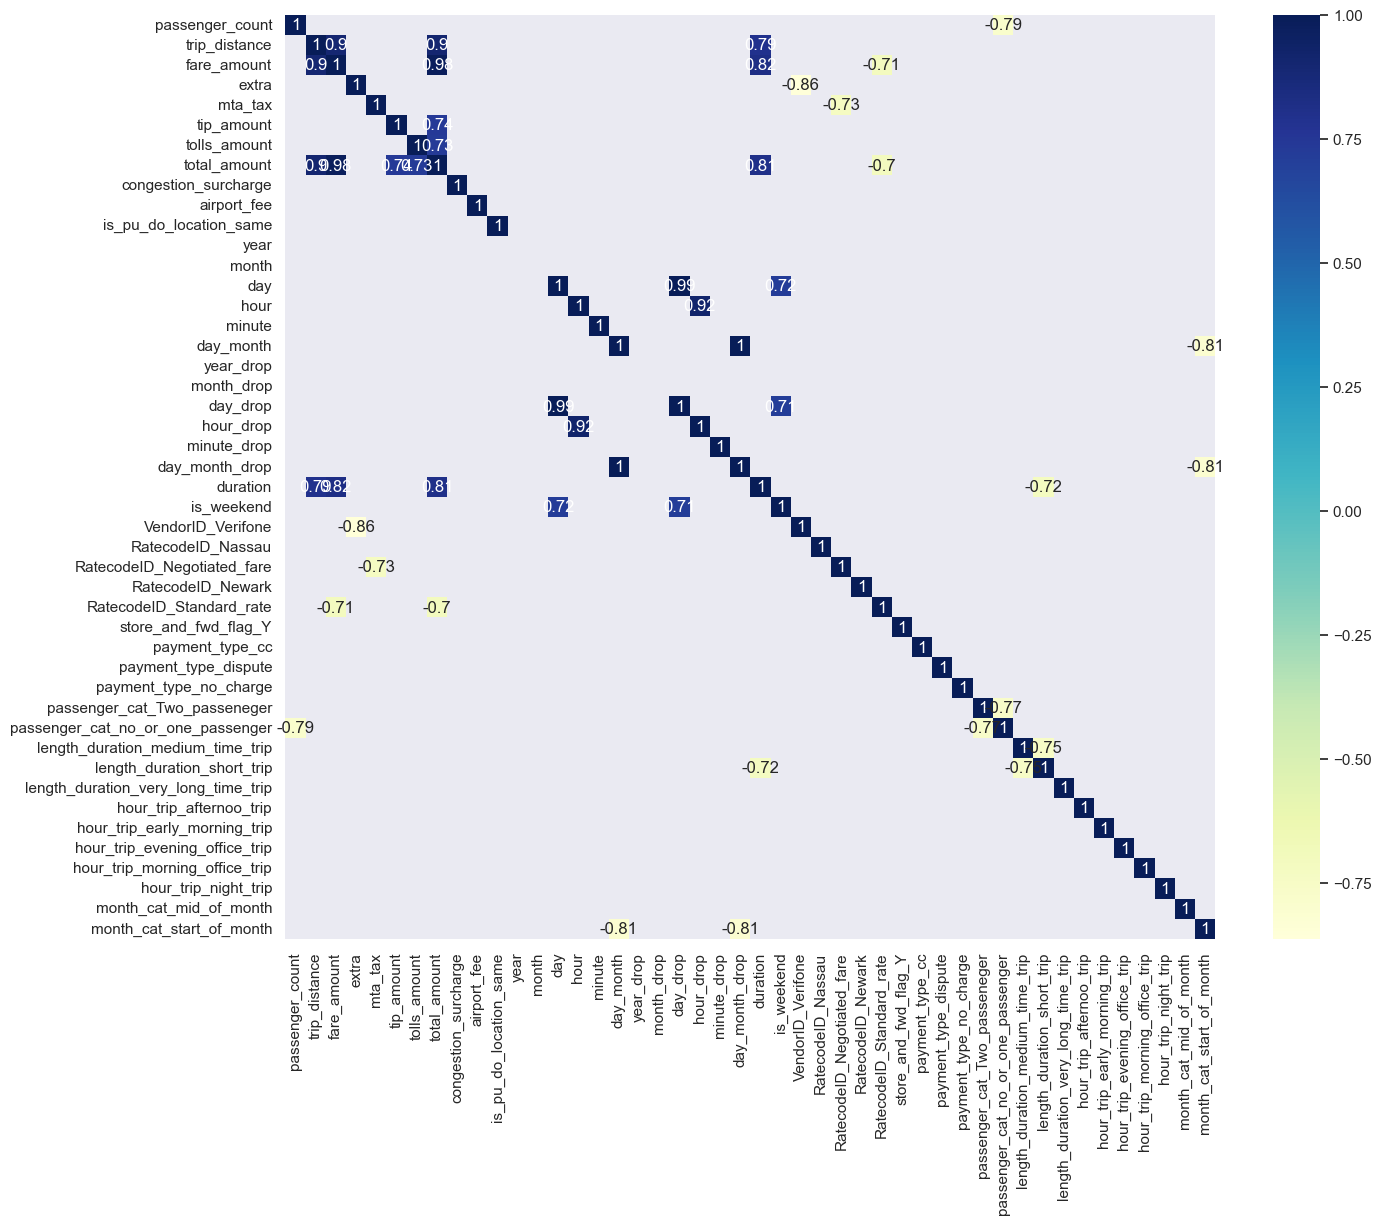

In [76]:
plt.figure(figsize=(15,12))
cr=all_df.corr()
cr=cr[abs(cr)>.7]
sns.heatmap(cr, cmap="YlGnBu", annot=True)
plt.show()

In [77]:
y=all_df["total_amount"]
x=all_df.drop(columns=["total_amount", "fare_amount"])

## Now we can apply model for resgressor problem

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [79]:
x_train,x_test, y_train,y_test=train_test_split(x,y, test_size=.3, random_state=0)

In [80]:
rf=RandomForestRegressor()
rf.fit(x_train, y_train)

RandomForestRegressor()

In [81]:
print("train_score", rf.score(x_train, y_train))
print("test_score", rf.score(x_test, y_test)) 

train_score 0.9970610776860832
test_score 0.9817868206338931


## We got Train_score 0.99% and Test score 0.98% , I think this is best score for our model.

In [82]:
variable_imp=pd.DataFrame({"Var": x_train.columns, "imp":rf.feature_importances_}).sort_values(by="imp", ascending=False)

In [83]:
variable_imp

,Var,imp
1,trip_distance,0.735533
4,tip_amount,0.122544
21,duration,0.061178
27,RatecodeID_Standard_rate,0.053931
5,tolls_amount,0.007776
3,mta_tax,0.001966
19,minute_drop,0.001541
25,RatecodeID_Negotiated_fare,0.001343
13,minute,0.001335
23,VendorID_Verifone,0.001275


In [84]:
variable_imp.iloc[:20,]["Var"].values

array(['trip_distance', 'tip_amount', 'duration',
       'RatecodeID_Standard_rate', 'tolls_amount', 'mta_tax',
       'minute_drop', 'RatecodeID_Negotiated_fare', 'minute',
       'VendorID_Verifone', 'hour_drop', 'hour', 'extra',
       'day_month_drop', 'day_month', 'congestion_surcharge',
       'RatecodeID_Newark', 'payment_type_cc', 'day_drop', 'day'],
      dtype=object)

### In the above table we got some randomforest best feature_importances as imp. so here we can select 20 best features for our model.

In [85]:
selected_var=['trip_distance', 'tip_amount', 'duration',
       'RatecodeID_Standard_rate', 'tolls_amount', 'mta_tax',
       'minute_drop', 'minute', 'hour_drop', 'congestion_surcharge',
       'hour', 'day_month', 'day_month_drop',
       'RatecodeID_Negotiated_fare', 'extra', 'day_drop', 'airport_fee',
       'day', 'payment_type_cc', 'VendorID_Verifone']

In [86]:
y=all_df["total_amount"]
x=all_df[selected_var]

In [87]:
x_train_select,x_test_select, y_train_select,y_test_select=train_test_split(x,y, test_size=.3, random_state=0)

In [88]:
rf=RandomForestRegressor()
rf.fit(x_train_select, y_train_select)
print("train_score", rf.score(x_train_select, y_train_select))
print("test_score", rf.score(x_test_select, y_test_select)) 

train_score 0.9970694269440042
test_score 0.9814634618228911


### Now we can predict our model

In [89]:
pred_train=rf.predict(x_train_select)
pred_test=rf.predict(x_test_select)

In [90]:
pred_train

array([12.9388,  9.275 , 10.9247, ..., 18.95  , 10.55  ,  8.3915])

In [91]:
pred_test

array([ 8.585 , 13.552 ,  7.2068, ..., 15.36  , 15.3575, 11.1593])

### We can find MSE 

In [92]:
print("Train MSE : ", np.mean((pred_train-y_train_select)**2))
print("Test MSE : ", np.mean((pred_test-y_test_select)**2))

Train MSE :  0.8004824071253054
Test MSE :  5.188578132011519


### We can find RMSE

In [93]:
print("Train RMSE : ", np.sqrt(np.mean((pred_train-y_train_select)**2)))
print("Test RMSE : ", np.sqrt(np.mean((pred_test-y_test_select)**2)))

Train RMSE :  0.8946968241394989
Test RMSE :  2.2778450632146865


### We can find MAE

In [94]:
print("Train MAE",np.mean(np.abs(pred_train-y_train_select) ))
print("Test MAE",np.mean(np.abs(pred_test-y_test_select) ))

Train MAE 0.20909585583434942
Test MAE 0.553818395405495


## We can apply GridSearchCV for best parameter, best estimator for our best moldel selection then we will see which model is best my data, Which can give us a best prediction.

In [95]:
from sklearn.model_selection import GridSearchCV

### We can find some best params 

In [96]:
params={"n_estimators":[100],
        #"criterion":["squared_error", "absolute_error"],
         "max_depth":[7,9,11],
        "min_samples_split":[10,20],
        "min_samples_leaf":[5,10,15],
         #"max_features":["sqrt", "log2"],
        "bootstrap":[True],
        "oob_score":[True]} 
rf0=RandomForestRegressor(random_state=0)
gsearch=GridSearchCV(estimator=rf0, param_grid=params, cv=10, verbose=2, n_jobs=-1)
gsearch.fit(x_train_select, y_train_select)

Fitting 10 folds for each of 18 candidates, totalling 180 fits


GridSearchCV(cv=10, estimator=RandomForestRegressor(random_state=0), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [7, 9, 11],
                         'min_samples_leaf': [5, 10, 15],
                         'min_samples_split': [10, 20], 'n_estimators': [100],
                         'oob_score': [True]},
             verbose=2)

In [97]:
gsearch.best_params_

{'bootstrap': True,
 'max_depth': 11,
 'min_samples_leaf': 5,
 'min_samples_split': 20,
 'n_estimators': 100,
 'oob_score': True}

#### These are the best params

In [98]:
gsearch.best_index_

13

In [99]:
gsearch.best_score_

0.9778959493847312

#### We got best_score  0.97 which is best.

In [100]:
rf_final=RandomForestRegressor(n_estimators=100,
                               bootstrap=True, 
                               min_samples_split=10,
                               min_samples_leaf=5,
                               oob_score=True)

In [101]:
rf_final.fit(x_train_select, y_train_select)
print("train_score", rf_final.score(x_train_select, y_train_select))
print("test_score", rf_final.score(x_test_select, y_test_select))

train_score 0.9886187994229422
test_score 0.9809854455773114


#### We got Train score : 0.98% and Test score :0 .98%   which is best.

### Now we can predict our model.

In [102]:
pred_train=rf_final.predict(x_train_select)
pred_test=rf_final.predict(x_test_select)

In [103]:
pred_train

array([12.94410786,  9.26978554, 11.01783352, ..., 18.9525375 ,
       10.54400429,  8.37756731])

In [104]:
pred_test

array([ 8.69884809, 13.57710848,  7.33318416, ..., 15.36373636,
       15.28039392, 11.13370734])

### RMSE  

In [105]:
print("Train RMSE : ", np.sqrt(np.mean((pred_train-y_train_select)**2)))
print("Test RMSE : ", np.sqrt(np.mean((pred_test-y_test_select)**2)))

Train RMSE :  1.7631678498774306
Test RMSE :  2.3070284057583046


### MAE

In [106]:
print("Train MAE",np.mean(np.abs(pred_train-y_train_select) ))
print("Test MAE",np.mean(np.abs(pred_test-y_test_select) ))

Train MAE 0.4110649709670102
Test MAE 0.5883696423852758


In [107]:
from sklearn.metrics import r2_score

In [108]:
r2 = r2_score(y_test_select, pred_test)

In [109]:
print('R2 Score :', r2)

R2 Score : 0.9809854455773114
